In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [32]:
def readfile(filename):
    data = pd.read_csv('salary_data.csv')
    X = data.iloc[:,:1].values.reshape(-1,1) # seprating the independent variable
    y = data.iloc[:, 1].values.reshape(-1,1) # slicing the dependent variable
    plt.title('Salary VS Experience Data( Training Set )')
    plt.scatter(X, y)
    plt.show()
    return X, y

In [33]:
def buildModel(X,Y):
    
    m = 0 # we can do something like this as well --> np.random.random(x.shape[1])
    c = 0

    L = 0.0001  # The learning Rate
    epochs = 1000  # The number of iterations to perform gradient descent
    n = float(len(X)) # Number of elements in X

# Performing Gradient Descent 
# Loss function - do partial derivative of 1/2n(sum((c+mX(i) - y(i)))**2) wrt to m and c
    for i in range(epochs): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (Y - Y_pred))  # Partial Derivative of loss function wrt m
        D_c = (-2/n) * sum(Y - Y_pred)  # Partial Derivative of Loss function wrt c
        m = m - L * D_m  # Update m
        c = c - L * D_c  # Update c
    return (m, c)

In [51]:
def bestFitLine(X,slope,coeff):
    Y_pred = slope*X + coeff
    return Y_pred

In [52]:
#Plot graph
def plotGraph(X,Y,Y_pred):
    plt.scatter(X, Y) # actual
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
    plt.show()

In [53]:
def predict(x, slope,coeff):
    y_pred = coeff + slope*x
    return y_pred

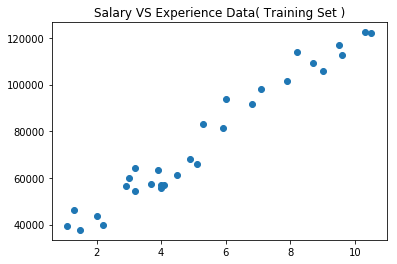

In [37]:
X, y = readfile('salary_data.csv')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
df = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': y_train.flatten()})
df

,X_train,y_train
0,2.9,56642
1,5.1,66029
2,3.2,64445
3,4.5,61111
4,8.2,113812
5,6.8,91738
6,1.3,46205
7,10.5,121872
8,3.0,60150
9,2.2,39891


In [46]:
slope, coeff = buildModel(X_train,y_train)   
y_pred=bestFitLine(X_test,slope,coeff)
df_result = pd.DataFrame({'Years of Experience': X_test.flatten(),'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_result

,Actual,Predicted,Years of Experience
0,37731,23075.292849,1.5
1,122391,139328.758503,10.3
2,57081,57422.907701,4.1
3,63218,54780.783482,3.9
4,116969,128760.261626,9.5
5,109431,118191.764748,8.7
6,112635,130081.323735,9.6
7,55794,56101.845591,4.0
8,83088,73275.653018,5.3
9,101302,107623.267870,7.9


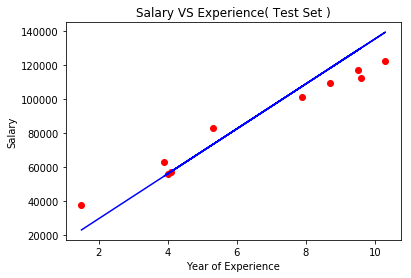

In [47]:
#plotGraph(X,Y,y_pred)
viz_train = plt
viz_train.scatter(X_test, y_test, color='red')
viz_train.plot(X_test, y_pred, color='blue')
viz_train.title('Salary VS Experience( Test Set )')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

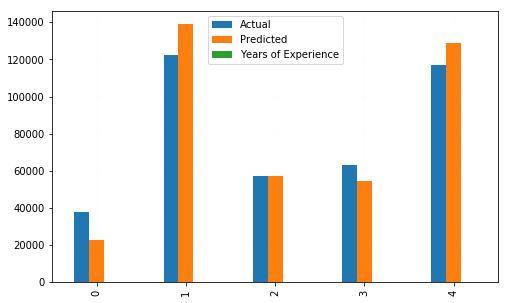

In [48]:
df1 = df_result.head()
df1.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.015', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.015', color='black')
plt.show()

Bar graph showing the comparison of Actual and Predicted values.

In [49]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 9481.240042649071
Mean Squared Error: 122947534.99338603
Root Mean Squared Error: 11088.170948961151


You can see that the value of root mean squared error is 11088, which is more than 10% of the mean value of the percentages of all the salary i.e. 76003. This means that our algorithm is not giving good prediction.

In [54]:
x = input("Enter the number")
x = float(x)
print(x*slope+coeff)

Enter the number10
[135365.57217407]
